# Revisão do Ciclo Rankine Regenerativo — Otimização a Uma Variável

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 16/09/2025  
> **Primeira publicação:** 21/09/2025   
> **Versão Atual:** v-2025-09-21-a (fase de teste técnico no Colab, teste didático-pedagógico com estudantes e início da revisão final de código/texto)

## Objetivos

- Revisar as leis de conservação aplicadas a volumes de controle (massa, 1ª e 2ª Leis).
- Aplicá-las a cada componente do ciclo regenerativo.
- Aprender o uso básico do *CoolProp* para propriedades da água e do vapor.
- Calcular a eficiência térmica do ciclo.
- Determinar a pressão intermediária que maximiza o rendimento.
                                                                                                            
                                                                                                            
## Referências 
                                                                                                            
- Moran, Shapiro, Boettner, Bailey. *Princípios de Termodinâmica para Engenharia*, 8a ed., 2018.  
- Stoecker. *Design of Thermal Systems*, 3r ed., 1989. 
- Documentação do *CoolProp*.

## Estrutura
- Revisão das Leis da Termodinâmica  
- Apresentação e modelagem do Ciclo Rankine Regenerativo
- Cálculo do Caso Base  
- Estudo Paramétrico  
- Otimização  
- Conclusão  



## Revisão das Leis

### Conservação da Massa para Volume de Controle

$$
 \left. \frac{\mathrm{d} m}{\mathrm{d} t} \right|_{V.C.} = 0  \tag{1}
$$

### 1ª Lei para Volume de Controle

$$
 \left. \frac{\mathrm{d} E}{\mathrm{d} t} \right|_{V.C.} = \sum_{\text{ent}} \dot{m} \left( h + \frac{\mathbb{V}^2}{2} + gz\right)  -  \sum_{\text{sai}} \dot{m} \left( h + \frac{\mathbb{V}^2}{2} + gz\right) + \sum \dot Q - \sum \dot W   \tag{2}
$$

### 2ª Lei para Volume de Controle

$$
\left. \frac{\mathrm{d} S}{\mathrm{d} t} \right|_{V.C.} = \sum_{\text{ent}} \dot{m} s  -  \sum_{\text{sai}} \dot{m} s + \sum \frac{\dot Q}{T} + \dot{S}_{\text{ger}} \tag{3} 
$$


$$
\dot{S}_{\text{ger}} \geq 0 \tag{4} 
$$


   
### Problema-Exemplo

Considere um Ciclo de Potência a Vapor Regenerativo onde conhecemos as três pressões ($p_1=8000\text{ kPa}$, $p_2=800\text{ kPa}$, $p_3=10\text{ kPa}$) e a temperatura na saída da caldeira ($T_h=320\text{ }^\circ\text{C}$).    


Hipóteses simplificativas:
  - Regime permanente $\mathrm{d}m/\mathrm{d}t=\mathrm{d}E/\mathrm{d}t=\mathrm{d}S/\mathrm{d}t=0 $
  - Não há perda de calor e de carga entre os equipamentos
  - Não há variação de energia cinética e pyotencial, entre as entradas e saídas dos equipamentos
  - As turbinas e bombas são adiabáticas ($\dot Q=0$) e reversíveis ($\dot{S}_{\text{ger}}=0$); logo, aplicando a 2ª Lei, chegamos à: $s_2=s_1$, $s_3=s_2$, $s_5=s_4$ e $s_7=s_6$
  - Oa títulos na saídas do condensador e do misturador são 0 (*i.e.*, $x_4=x_6=0$)

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-ciclo-regenerativo-fig-01.png"
       alt="Diagrama de equipamentos do Ciclo Regenerativo"
       width="480" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Diagrama de equipamentos do Ciclo Regenerativo.</figcaption>
</figure>

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-ciclo-regenerativo-fig-02.png"
       alt="Diagrama T-s do Ciclo Regenerativo"
       width="480" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Diagrama T-s do Ciclo Regenerativo.</figcaption>
</figure>

      
### Rendimento do Ciclo

$$
   \eta_{\text{ciclo}} =  \frac{\dot W_{\text{liq}}}{\dot Q_{\text{h}}} = \frac{\dot W_{\text{turb,alta}} + \dot W_{\text{turb,baixa}} + \dot W_{\text{bomba,alta}} + \dot W_{\text{bomba,baixa}}}{\dot Q_{\text{h}}} \tag{5}
$$

onde:

$$
\begin{aligned}
  \dot W_{\text{turb,alta}} &= \dot m \left(  h_1 - h_2 \right) \\
  \dot W_{\text{turb,baixa}} &= \dot m \left(  1 - \alpha \right)  \left(  h_2 - h_3 \right)  \\
  \dot W_{\text{bomba,alta}} &=  \dot m \left(  h_6 - h_7 \right) \\
  \dot W_{\text{bomba,baixa}} &= \dot m \left(  1 - \alpha \right)  \left(  h_4 - h_5 \right)  \\
  \dot  Q_{\text{h}} &= \dot m \left(  h_1 - h_7 \right)  \\
\end{aligned}
\tag{6}
$$

Aplicando a primeira lei no misturador ($0 = \dot m \alpha  h_2 + \dot m \left(  1 - \alpha \right) h_5 - \dot m h_6$):
    
$$
\begin{aligned}
   \alpha = \frac{h_6 - h_5}{h_2 - h_5} 
\end{aligned}
\tag{7}
$$
      
Então:

$$
   \eta_{\text{ciclo}} =  \frac{  \left(  h_1 - h_2 \right) + \left(  1 - \alpha \right)  \left(  h_2 - h_3 \right)  + \left(  h_6 - h_7 \right) + \left(  1 - \alpha \right)  \left(  h_4 - h_5 \right)}{\left(  h_1 - h_7 \right)} \tag{8}
$$


Finalmente, dividindo a potência líquida do ciclo pelo fluxo de massa, obtemos:

$$
   w_{\text{liq}} = \frac{\dot W_{\text{liq}}}{\dot m} = \left(  h_1 - h_2 \right) + \left(  1 - \alpha \right)  \left(  h_2 - h_3 \right)  + \left(  h_6 - h_7 \right) + \left(  1 - \alpha \right)  \left(  h_4 - h_5 \right) \tag{9}
$$
                     

In [1]:
# Preparo do ambiente
# Observação: garanta ter CoolProp instalado no seu Python local:
# pip install CoolProp
import math
import numpy as np
import matplotlib.pyplot as plt

try:
    from CoolProp.CoolProp import PropsSI
except Exception as e:
    print("Aviso: CoolProp não disponível. Instale com `pip install CoolProp`.")
    raise

# Convenções e unidades:
# Pressões em Pa (ou MPa para impressão), temperaturas em K (ou °C para impressão),
# vazões mássicas em kg/s, entalpias em J/kg, entropias em J/kg-K, potências em W.
def MPa(p_pa):  # útil para impressão
    return p_pa/1e6

def C(T_K):
    return T_K - 273.15


fluid = "Water"

def h_PT(P, T):
    return PropsSI("H","P",P,"T",T,fluid)  # J/kg

def s_PT(P, T):
    return PropsSI("S","P",P,"T",T,fluid)  # J/kg-K

def rho_PT(P, T):
    return PropsSI("D","P",P,"T",T,fluid)  # kg/m^3

def v_PT(P, T):
    return 1.0/rho_PT(P,T)  # m^3/kg

def T_sat(P):
    return PropsSI("T","P",P,"Q",0,fluid)

def h_f(P):
    return PropsSI("H","P",P,"Q",0,fluid)

def h_g(P):
    return PropsSI("H","P",P,"Q",1,fluid)

def s_f(P):
    return PropsSI("S","P",P,"Q",0,fluid)

def s_g(P):
    return PropsSI("S","P",P,"Q",1,fluid)


In [2]:
# Parâmetros do ciclo (ajuste conforme o problema de referência) 

p_h = 8e6 # Pa 
p_m = 0.8e6 # Pa 
p_l = 0.01e6 # Pa 
T_h = 320 # C

In [4]:
# === Definições gerais e função de métricas do ciclo (η, α, W_liq) em função de p2 ===
# Pressupõe que você JÁ executou:
# - imports do numpy/matplotlib
# - CoolProp PropsSI + helpers: h_PT, s_PT, h_f, T_sat, etc.
# - parâmetros p_h, p_m, p_l, T_h (com T_h em °C)

def metrics_vs_p2(p2):
    """
    Calcula métricas do ciclo regenerativo (1 OFWH aberto) para um dado p2.
    Hipóteses: turbinas reversíveis (isentrópicas), bombas com Δh ≈ v_sat·Δp, m_dot (na caldeira) = 1.
    Retorna:
      eta   : rendimento térmico [-]
      alpha : fração de sangria [-]
      W_liq : trabalho líquido específico [J/kg]
    Se inviável, retorna np.nan para a(s) grandeza(s) afetada(s).
    """
    try:
        Th_K = T_h + 273.15

        # 1) Saída da caldeira
        h1 = h_PT(p_h, Th_K)
        s1 = s_PT(p_h, Th_K)

        # 2) Turbina alta até p2 (isentrópica)
        h2 = PropsSI("H", "P", p2, "S", s1, fluid)

        # 5) Saída do condensador (liq. sat. a p3)
        h5 = h_f(p_l)

        # 4) Bomba baixa (p3 -> p2) na corrente (1-α)
        v5 = 1.0/PropsSI("D", "P", p_l, "Q", 0, fluid)
        h4 = h5 + v5*(p2 - p_l)

        # 6) OFWH (saída liq. sat. a p2)
        h6 = h_f(p2)

        # α pelo balanço de mistura no OFWH: α h2 + (1-α) h5 = h6
        denom = (h2 - h5)
        if abs(denom) < 1e-12:
            return np.nan, np.nan, np.nan
        alpha = (h6 - h5)/denom

        if not (0.0 < alpha < 1.0):
            # fora do intervalo físico
            return np.nan, alpha, np.nan

        # 7) Bomba alta (p2 -> p1)
        v6 = 1.0/PropsSI("D", "P", p2, "Q", 0, fluid)
        h7 = h6 + v6*(p_h - p2)

        # 3) Turbina baixa (p2 -> p3) para a fração (1-α); isentrópica (s3 = s1)
        h3 = PropsSI("H", "P", p_l, "S", s1, fluid)

        # Trabalhos e calor por kg que entra na caldeira (m_dot = 1)
        W_t_alta   = (h1 - h2)
        W_t_baixa  = (1.0 - alpha)*(h2 - h3)
        W_baixa    = (1.0 - alpha)*(h4 - h5)   # consumo
        W_alta     = (h7 - h6)                 # consumo
        W_liq      = (W_t_alta + W_t_baixa) - (W_baixa + W_alta)
        Q_h        = (h1 - h7)

        if Q_h <= 0:
            return np.nan, alpha, W_liq

        eta = W_liq / Q_h
        return eta, alpha, W_liq

    except Exception:
        return np.nan, np.nan, np.nan

# --- Caso base: usar o p_m já definido ---
eta_base, alpha_base, Wliq_base = metrics_vs_p2(p_m)

print(f"[Caso base] p2 = {p_m/1e6:.3f} MPa")
print(f"  eta   = {eta_base:.6f}")
print(f"  alpha = {alpha_base:.6f}")
print(f"  W_liq = {Wliq_base/1e3:.3f} kJ/kg")


[Caso base] p2 = 0.800 MPa
  eta   = 0.396996
  alpha = 0.233938
  W_liq = 853.359 kJ/kg


Calculamos então que, para o caso base (*i.e.*, $p_2$=800 kPa) o rendimento do cliclo é 0,397, a fração da massa extraída para o misturador é 23,4\% e o trabalho líquido por unidade 
de massa que passa na caldeira é 853,4 kJ/kg.

## Estudo Paramétrico

Vamos agora estudar como o rendimento do ciclo varia com a pressão intermediária. Para tanto, vamos variar $p_2$ e *plotar* o que acontece com o rendimento. Poderemos, então, estimar visualmente o valor ótimo do rendimento.

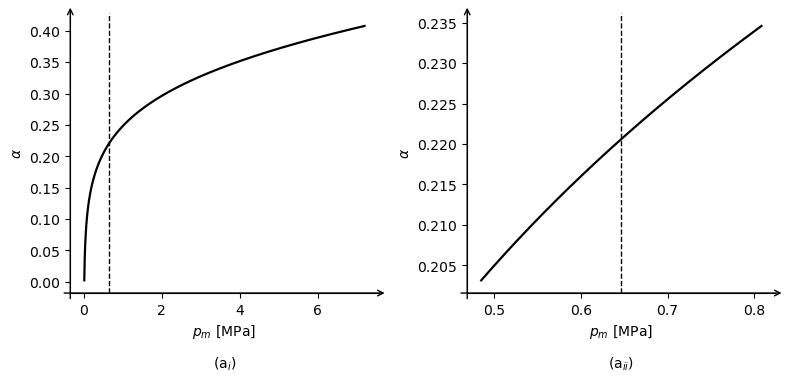

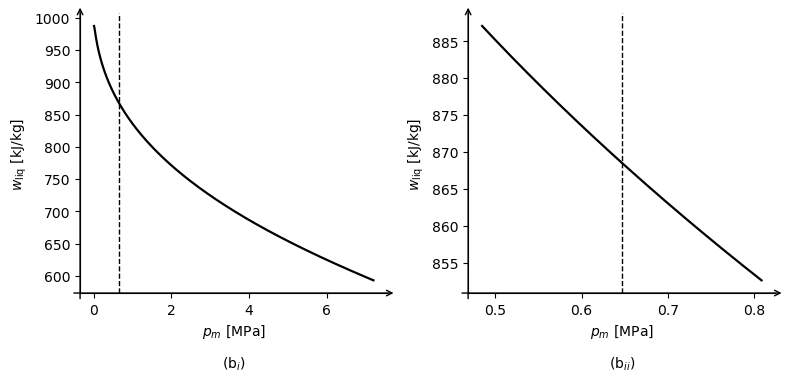

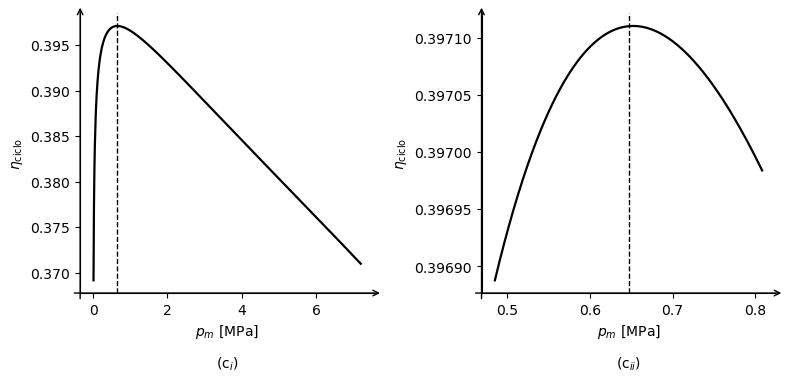

In [5]:
# --- Variação paramétrica em p2, usando metrics_vs_p2(p2) ---
# Estilo P&B minimalista, eixos com setas, dois painéis (amplo/zoom), linha vertical tracejada no ótimo de η.

import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# ===== estilo global (P&B, sem grid, traços distintos) =====
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.prop_cycle'] = (
    cycler('color', ['k']) * cycler('linestyle', ['-', '--', '-.', ':'])
)
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.frameon'] = False

def axes_minimal_with_arrows(ax):
    """Mostra só eixos esquerdo e inferior e desenha setas nas extremidades."""
    for side in ('top', 'right'):
        ax.spines[side].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    # setas nos eixos (coordenadas do eixo: 0..1)
    ax.annotate('', xy=(1.02, 0.0), xytext=(-0.02, 0.0),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))
    ax.annotate('', xy=(0.0, 1.02), xytext=(0.0, -0.02),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))

def panel_label_center(ax, label, y_offset=-0.22):
    ax.text(0.5, y_offset, label, transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# --- Faixas de p2 ---
p2_full = np.linspace(max(1.05*p_l, 1.0e4), 0.9*p_h, 600)

etas_full  = np.empty_like(p2_full, dtype=float)
alph_full  = np.empty_like(p2_full, dtype=float)
wliq_full  = np.empty_like(p2_full, dtype=float)
for i, P in enumerate(p2_full):
    etas_full[i], alph_full[i], wliq_full[i] = metrics_vs_p2(P)

# Encontrar p2* (máximo de η)
valid_mask = np.isfinite(etas_full)
if valid_mask.any():
    i_opt  = np.nanargmax(etas_full)
    p2_opt = p2_full[i_opt]
else:
    p2_opt = 0.5*(p2_full[0] + p2_full[-1])

# Faixa de zoom ao redor do ótimo
half_span = 0.25*p2_opt
p2_zoom = np.linspace(max(p2_opt - half_span, 1.05*p_l),
                      min(p2_opt + half_span, 0.95*p_h), 400)

etas_zoom = np.empty_like(p2_zoom, dtype=float)
alph_zoom = np.empty_like(p2_zoom, dtype=float)
wliq_zoom = np.empty_like(p2_zoom, dtype=float)
for i, P in enumerate(p2_zoom):
    etas_zoom[i], alph_zoom[i], wliq_zoom[i] = metrics_vs_p2(P)

x_opt_MPa = p2_opt/1e6  # para desenhar a linha vertical


# --- (b) α vs p2 ---
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(p2_full/1e6, alph_full)
axs[0].axvline(x_opt_MPa, linestyle='--', linewidth=1.0)
axs[0].set_xlabel(r'$p_m\ [\mathrm{MPa}]$')
axs[0].set_ylabel(r'$\alpha$')
axes_minimal_with_arrows(axs[0]); panel_label_center(axs[0], '(a$_{i}$)')

axs[1].plot(p2_zoom/1e6, alph_zoom)
axs[1].axvline(x_opt_MPa, linestyle='--', linewidth=1.0)
axs[1].set_xlabel(r'$p_m\ [\mathrm{MPa}]$')
axs[1].set_ylabel(r'$\alpha$')
axes_minimal_with_arrows(axs[1]); panel_label_center(axs[1], '(a$_{ii}$)')
plt.tight_layout(); plt.show()

# --- (c) W_liq vs p2 ---
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(p2_full/1e6, wliq_full/1e3)  # kJ/kg
axs[0].axvline(x_opt_MPa, linestyle='--', linewidth=1.0)
axs[0].set_xlabel(r'$p_m\ [\mathrm{MPa}]$')
axs[0].set_ylabel(r'$w_{\mathrm{liq}}\ [\mathrm{kJ/kg}]$')
axes_minimal_with_arrows(axs[0]); panel_label_center(axs[0], '(b$_{i}$)')

axs[1].plot(p2_zoom/1e6, wliq_zoom/1e3)  # kJ/kg
axs[1].axvline(x_opt_MPa, linestyle='--', linewidth=1.0)
axs[1].set_xlabel(r'$p_m\ [\mathrm{MPa}]$')
axs[1].set_ylabel(r'$w_{\mathrm{liq}}\ [\mathrm{kJ/kg}]$')
axes_minimal_with_arrows(axs[1]); panel_label_center(axs[1], '(b$_{ii}$)')
plt.tight_layout(); plt.show()

# --- (a) η vs p2 ---
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(p2_full/1e6, etas_full)
axs[0].axvline(x_opt_MPa, linestyle='--', linewidth=1.0)
axs[0].set_xlabel(r'$p_m\ [\mathrm{MPa}]$')
axs[0].set_ylabel(r'$\eta_{\text{ciclo}}$')
axes_minimal_with_arrows(axs[0]); panel_label_center(axs[0], '(c$_{i}$)')

axs[1].plot(p2_zoom/1e6, etas_zoom)
axs[1].axvline(x_opt_MPa, linestyle='--', linewidth=1.0)
axs[1].set_xlabel(r'$p_m\ [\mathrm{MPa}]$')
axs[1].set_ylabel(r'$\eta_{\text{ciclo}}$')
axes_minimal_with_arrows(axs[1]); panel_label_center(axs[1], '(c$_{ii}$)')
plt.tight_layout(); plt.show()



<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <figcaption><b>Figura 3.</b> Estudo de como a pressão intermediária ($p_2$) influencia o rendimento do ciclo ($\eta_{\text{ciclo}}$), a fração de massa extraída para o regenerador ($\alpha$) e o trabalho líquido ($w_{\text{liq}}$).</figcaption>
</figure>

## Discussão breve dos resultados

- **Por que $\alpha$ aumenta com $p_2$?**  

Aumentar a pressão intermediária, aumenta tanto $h_6$ quanto $h_2$. Logo, não é óbvio pela Eq.7 se $\alpha$ deveria aumentar ou diminuir. Isso é comum em termodinâmica, já que as relações termodinâmicas (que estão por trás das tabelas e do *CoolProp*) são não-lineares. O estudo paramétrico, no entanto, nos mostra que $\alpha$ aumenta com $p_2$. Em outras palavras, que o simples aumento de $h_2$ não é suficiente para aumentar $h_6$, sendo necessário para isso também um aumento no fluxo de massa desviado da turbina para o misturador.


- **Por que o trabalho líquido $w_{\text{liq}}$ cai com $p_2$?**  

A queda de $w_{\text{liq}}$ é mais fácil de explicar. Primeiro, devemos lembrar que os trabalhos nas bombas são bem menores que nas turbinas (porque o volume específico do líquido é muito menor que do vapor). Logo, $w_{\text{liq}}$ é dominado praticamente apenas pelas turbinas. Como a massa (proporcional a $\alpha$) é menor na pressão de baixa pressão, consequentemente o trabalho total do ciclo também é.

- **Por que a eficiência $\eta$ tem um máximo em $p_2$?**  

O rendimento é um pouco mais difícil. Com o desvio de parte do fluxo de massa das turbinas para o misturador, diminui tanto o trabalho das turbinas (menos massa) quanto o calor fornecido na caldeira (a água entra mais quente, logo precisa de menos calor). Como os dois comportamentos são antagônicos (um tende a diminuir o rendimento, o outro a aumentar), não podemos concluir nada apenas pela Eq.5. O estudo paramétrico, no entando, nos mostra que o rendimento primeiro aumenta com $p_2$ e depois tem uma queda.


Vamos reescrever a Eq.5 para tentar compreender um pouco melhor o comportamento de $\eta$ com $p_2$.


$$
   \eta_{\text{ciclo}} = \frac{w_\text{liq}}{q_h} = \frac{q_h + q_l}{q_h} = 1 + \frac{q_l}{q_h} = 1 - \frac{(1-\alpha)(h_3-h_4)}{(h_1 - h_7)}  \tag{10}
$$

Como $h_1$, $h_3$ e $h_4$ não variam com $p_2$, temos que $\eta_{\text{ciclo}}$ varia com $\alpha$ e com $h_7$. Mas, para ficar mais fácil fazer as comparações numéricas, 
vamos estudar os termos $a=(1-\alpha)$ e $b=(h_1-h_7)/(h_3-h_4)$. Então:


$$
   \eta_{\text{ciclo}} = 1 - \frac{a}{b}  \tag{11}
$$

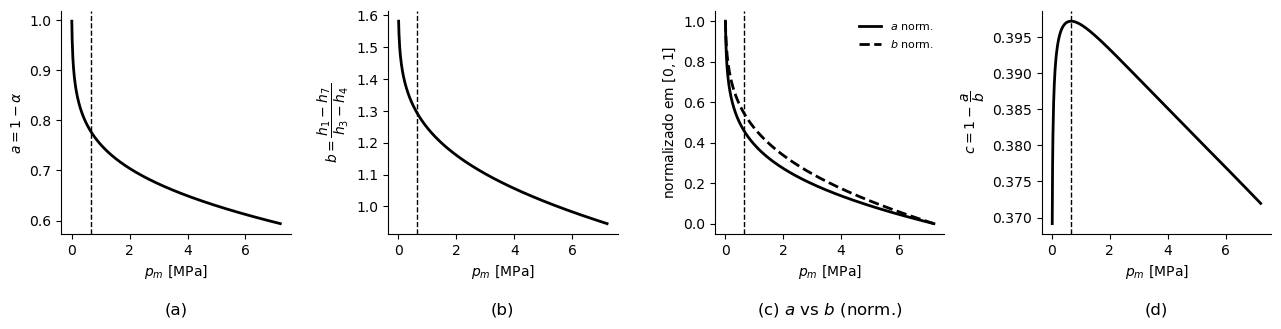

In [7]:
# --- Curvas de a, b, (a vs b normalizados) e c vs p2 ---
# a = (1 - α)
# b = (h1 - h7)/(h3 - h4)        # <- como você pediu
# c = - a / b = (1-α)*(h4 - h3)/(h1 - h7)

import numpy as np
import matplotlib.pyplot as plt

def enthalpies_alpha(p2):
    # Convenção: 4 = saída do condensador (liq. sat. a p3), 5 = pós-bomba baixa (p3->p2)
    Th_K = T_h + 273.15
    h1 = h_PT(p_h, Th_K); s1 = s_PT(p_h, Th_K)

    h2 = PropsSI("H","P",p2,"S",s1,fluid)        # 2 (isent. p1->p2)
    h3 = PropsSI("H","P",p_l,"S",s1,fluid)       # 3 (isent. p2->p3)

    h4 = h_f(p_l)                                # 4: liq. sat. a p3 (fixo em p2)
    v4 = 1.0/PropsSI("D","P",p_l,"Q",0,fluid)
    h5 = h4 + v4*(p2 - p_l)                      # 5: após bomba baixa

    h6 = h_f(p2)                                 # 6: liq. sat. a p2 (OFWH)
    v6 = 1.0/PropsSI("D","P",p2,"Q",0,fluid)
    h7 = h6 + v6*(p_h - p2)                      # 7: após bomba alta

    alpha = (h6 - h5)/(h2 - h5)                  # balanço no OFWH (aberto)
    return h1,h2,h3,h4,h5,h6,h7,alpha

# faixa de p2
p2_full = np.linspace(max(1.05*p_l, 1.0e4), 0.9*p_h, 600)

a_arr = np.empty_like(p2_full)
b_arr = np.empty_like(p2_full)
c_arr = np.empty_like(p2_full)
etas  = np.empty_like(p2_full)

for i,P in enumerate(p2_full):
    h1,h2,h3,h4,h5,h6,h7,alpha = enthalpies_alpha(P)
    a = 1.0 - alpha
    b = (h1 - h7)/(h3 - h4)          # <- h3 - h4 (positivo)
    c = 1 - a / b                      # para manter c = (1-α)(h4-h3)/(h1-h7)
    a_arr[i], b_arr[i], c_arr[i] = a, b, c

    # eficiência só para localizar p2* (máx. de η)
    N = (h1 - h7) + (1.0 - alpha)*(h4 - h3)
    etas[i] = N/(h1 - h7)

# p2 ótimo (máximo de η)
i_opt = np.nanargmax(etas)
x_opt = p2_full[i_opt]/1e6  # MPa

# normalização min–max
def minmax(y):
    y_min, y_max = np.nanmin(y), np.nanmax(y)
    return (y - y_min)/(y_max - y_min) if y_max > y_min else np.zeros_like(y)

a_norm = minmax(a_arr)
b_norm = minmax(b_arr)

# --- plots (4 painéis) ---
fig, axs = plt.subplots(1, 4, figsize=(13,3.6))

# (a) a(p2)
axs[0].plot(p2_full/1e6, a_arr, lw=2)
axs[0].axvline(x_opt, ls='--', color='k', lw=1.0)
axs[0].set_xlabel(r'$p_m\ [\mathrm{MPa}]$'); axs[0].set_ylabel(r'$a=1-\alpha$'); axs[0].set_title('(a)', y=-0.4)

# (b) b(p2) com h3-h4
axs[1].plot(p2_full/1e6, b_arr, lw=2)
axs[1].axvline(x_opt, ls='--', color='k', lw=1.0)
axs[1].set_xlabel(r'$p_m\ [\mathrm{MPa}]$'); axs[1].set_ylabel(r'$b=\dfrac{h_1-h_7}{\,h_3-h_4\,}$'); axs[1].set_title('(b)', y=-0.4)

# (c) sobreposição normalizada: a vs b
axs[2].plot(p2_full/1e6, a_norm, lw=2, label=r'$a$ norm.')
axs[2].plot(p2_full/1e6, b_norm, lw=2, label=r'$b$ norm.')
axs[2].axvline(x_opt, ls='--', color='k', lw=1.0)
axs[2].set_xlabel(r'$p_m\ [\mathrm{MPa}]$', y=-0.4); axs[2].set_ylabel(r'normalizado em $[0,1]$')
axs[2].set_title('(c) $a$ vs $b$ (norm.)', y=-0.4); axs[2].legend()

# (d) c(p2) = -a/b
axs[3].plot(p2_full/1e6, c_arr, lw=2)
axs[3].axvline(x_opt, ls='--', color='k', lw=1.0)
axs[3].set_xlabel(r'$p_m\ [\mathrm{MPa}]$'); axs[3].set_ylabel(r'$c=1-\,\dfrac{a}{b}$'); axs[3].set_title('(d)', y=-0.4)

for ax in axs:
    for side in ('top','right'): ax.spines[side].set_visible(False)

plt.tight_layout(); plt.show()


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <figcaption><b>Figura 4.</b> Estudo de como a pressão intermediária ($p_2$) influencia nos termos $a=(1-\alpha)$ e $b=(h_1-h_7)/(h_3-h_4)$. Obs.: a figura (c) foi normalizada para facilitar a comparação. </figcaption>
</figure>

Observamos então que, pela Fig.4(c), para valores de $p_2$ abaixo do ótimo, a queda de $a$ (ou o aumento de $\alpha$) tem um efeito maior que a queda de $b$ (ou aumento de $h_7$). 
Para valores acima da pressão ótima, ocorre o inverso. Isso explica porque a curva de rendimento, Fig.4(d) tem um ponto de máximo.

Até agora, fizemos uma otimização visual apenas. Vamos usar o método de Brent para encontrar um valor mais preciso.

In [11]:
# === Otimização 1D de eta(p2) — versão mínima, sem try/except, sem "safe" ===
from scipy.optimize import minimize_scalar

def obj(P):
    eta, alpha, Wliq = metrics_vs_p2(P)
    return -eta  # minimizar -eta => maximiza eta

# Intervalo simples (acima de p3 e abaixo de p1)
a = max(1.05*p_l, 1.0e4)
b = 0.95*p_h

# Otimização 1D (Brent com limites) — SciPy minimize_scalar(method='bounded')
res = minimize_scalar(obj, bounds=(a, b), method='bounded', options={'xatol': 2e3})
p2_opt = float(res.x)
eta_opt, alpha_opt, Wliq_opt = metrics_vs_p2(p2_opt)

print(f"p2*   = {p2_opt/1e6:.4f} MPa")
print(f"eta*  = {eta_opt:.6f}")
print(f"alpha* = {alpha_opt:.6f}")
print(f"W_liq* = {Wliq_opt/1e3:.3f} kJ/kg")


p2*   = 0.6522 MPa
eta*  = 0.397110
alpha* = 0.221146
W_liq* = 867.947 kJ/kg


Obtivemos um valor bastante parecido com o que havia sido obtido anteriormente na inspeção visual dos gráficos do estudo paramétrico.

## Conclusão

Nesta nota de estudo, revisamos a modelagem de um Ciclo Rankine Regenarativo. Depois, otimizamos a pressão intermediária de duas formas: 1) inspeção visual nos gráficos do estudo paramétrico e 2) usando o Método de Brent. Encontramos valores bastante parecidos. O estudo paramétrico nos traz um conhecimento importante sobre o comportamento do sistema, mas o método automático é mais rápido e prático quando desejamos apenas o valor. Ainda, quando há mais de uma variável, a obtenção visual do ponto de ótimo pode ser difícil.

## Problema Propostos

- Implementar as eficiências isentrópicas nas bombas e turbinas.
- Estudar o impacto dessas eficiências no rendimento.
- Estudar a influência do subresfriamento na saída do misturador no rendimento.
- Introduzir trocadores de calor no evaporador e no condensador, no lugar de especificar suas pressões de operação.
